# Sarcasm Detection in Reddit Comments

# Business Problem
The business problem is to develop an accurate sarcasm detection system for Reddit comments, leveraging a large dataset of sarcastic and non-sarcastic remarks. Sarcasm detection is crucial for enhancing user experience, as it enables more nuanced content moderation and sentiment analysis. Accurately identifying sarcastic comments can improve content recommendations and interactions by preventing misinterpretations and ensuring relevant user engagement. Additionally, understanding which features signal sarcasm can refine moderation processes and sentiment analysis tools, ultimately leading to a more positive and engaging online environment.

# Solution
To address the problem of detecting sarcasm in Reddit comments, we developed a comprehensive solution utilizing state-of-the-art natural language processing (NLP) techniques. 
Here is a step-by-step breakdown of our approach:
Data Collection: We sourced the dataset from Kaggle, which contains 1.3 million comments labeled as sarcastic or non-sarcastic, along with other metadata such as author, subreddit, score, ups, downs, date, timestamp, and parent comment.
Data Cleaning: Using the BERT tokenizer, we preprocessed the text data to ensure consistency and prepare it for model training. This step involved normalizing text, handling missing values, and tokenizing the comments into a format suitable for the BERT model.
Model Training: We employed the BERT (Bidirectional Encoder Representations from Transformers) model, a powerful pre-trained transformer model known for its effectiveness in NLP tasks. The model was fine-tuned on our cleaned dataset to learn the nuances of sarcastic versus non-sarcastic comments.
Balancing the Data: Ensuring the dataset was balanced between sarcastic and non-sarcastic comments was crucial for training a fair and unbiased model. This step helped in avoiding skewed predictions and improving overall model performance.
Model Evaluation: After training, we evaluated the model using various metrics such as accuracy, precision, recall, and F1 score. We computed the confusion matrix to understand the model's performance in classifying sarcastic and non-sarcastic comments.
Making Predictions: With the trained and evaluated model, we made predictions on new Reddit comments, identifying whether they were sarcastic or not with high accuracy.

# How it would help business
Implementing the sarcasm detection solution significantly enhances user experience by improving content recommendations and reducing misinterpretations. It aids in effective content moderation and businesses gain more accurate insights into customer sentiments, leading to better marketing strategies and customer service.

The solution also fosters clearer communication in online discussions, benefiting both users and platforms. Overall, it provides businesses with reliable social media analytics and strategic decisions.

# Dataset Description
The Sarcasm on Reddit dataset, sourced from Kaggle, contains 1.3 million comments from the Reddit platform. This balanced dataset includes comments labeled as either sarcastic or non-sarcastic, allowing for the development and training of machine learning models to detect sarcasm. Each comment is accompanied by various metadata attributes such as the author, subreddit, score, ups, downs, date, timestamp, and the parent comment to provide context and enhance the model's understanding.

Attributes:
label: Indicates if the comment is sarcastic (1) or non-sarcastic (0).
comment: The actual text of the comment.
author: The username of the commenter.
subreddit: The subreddit where the comment was posted.
score: The net score of upvotes and downvotes.
ups: The number of upvotes.
downs: The number of downvotes.
date: The date the comment was posted.
created_utc: The timestamp when the comment was posted.
parent_comment: The text of the parent comment to which the comment was a response.

Examples:
You do know west teams play against west teams more than east teams right?
Damn I was hoping God was real
I can't wait until @potus starts a twitter war against Morning Joe.

# Data Visualization
Number of rows in the dataset: 1010826
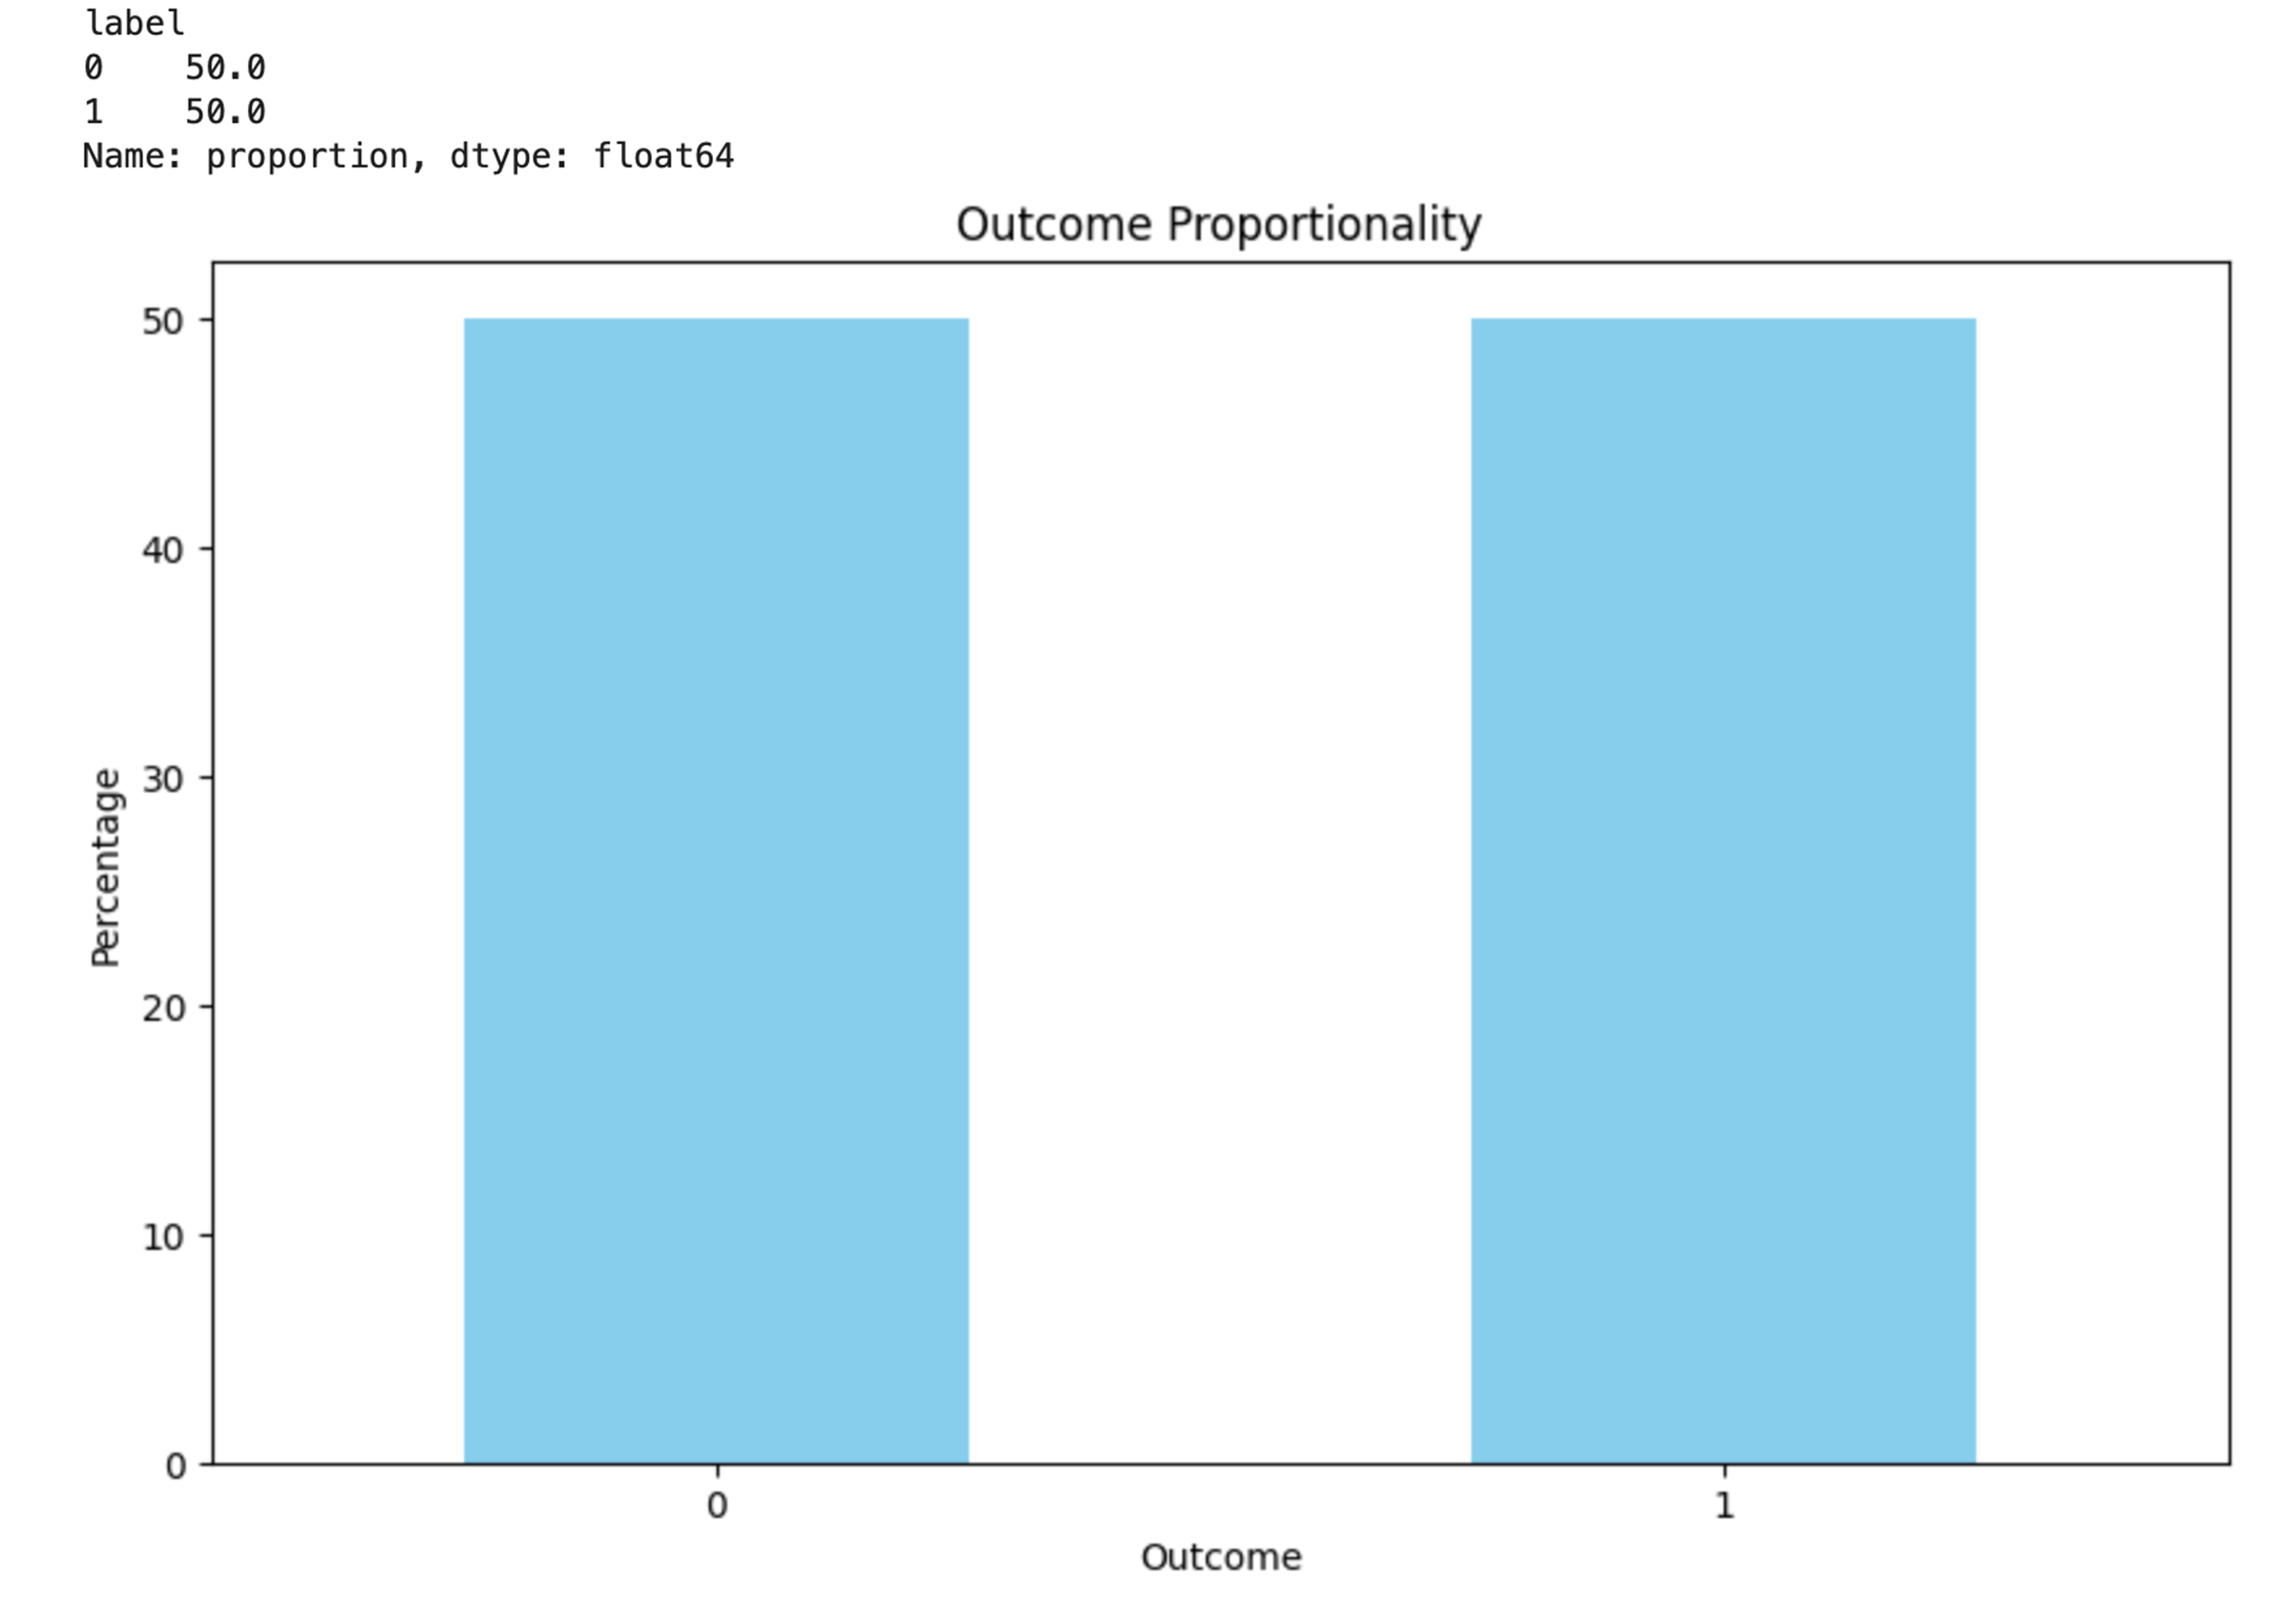

# Data Preprocessing 
Load and Explore Dataset: Loaded the dataset and explored it to understand the structure and distribution of comments.
Text Normalization: Converted text to lowercase and removed unnecessary characters.
BERT Tokenization: Tokenized the text using BERT tokenizer, add special tokens, and create attention masks.
Handled Missing Values: Removed comments with missing text.
Data Splitting: Split the dataset into training, validation, and test sets using stratified sampling to maintain class balance.

By following these data preprocessing steps, we ensured that our sarcasm detection model was trained on clean, balanced, and appropriately tokenized data, leading to better performance and more reliable predictions.

# Tokenization and embedding techniques
BERT Tokenizer Overview
Tokenization:
Basic: Splits text into words, handles punctuation, and lowercases.
WordPiece: Splits words into subword units for better handling of out-of-vocabulary words.

Word2Vec Embeddings:
Maps words to vectors: Capturing semantic relationships.
Similar meaning, similar vectors: e.g., "king" & "queen" close in vector space.

# Modeling
Machine Learning  Models:
I implemented Decision Tree and Naive Bayes models for sarcasm detection. The Decision Tree model outperformed Naive Bayes, achieving an accuracy of 59% and a more favorable classification report. Despite its moderate accuracy, the Decision Tree's performance suggests it can better handle the complexity of sarcasm detection compared to Naive Bayes.

Deep Learning Models: I implemented CNN, RNN, and LSTM deep learning models for sarcasm detection. Among these, the LSTM model provided the highest accuracy of about 56% and delivered a better classification report. This suggests that the LSTM model, is more effective in detecting sarcasm compared to CNN and RNN models. Despite its moderate accuracy, the LSTM model's performance indicates its potential for handling the complexities of sarcasm detection in Reddit comments.

# Evaluation Metrics
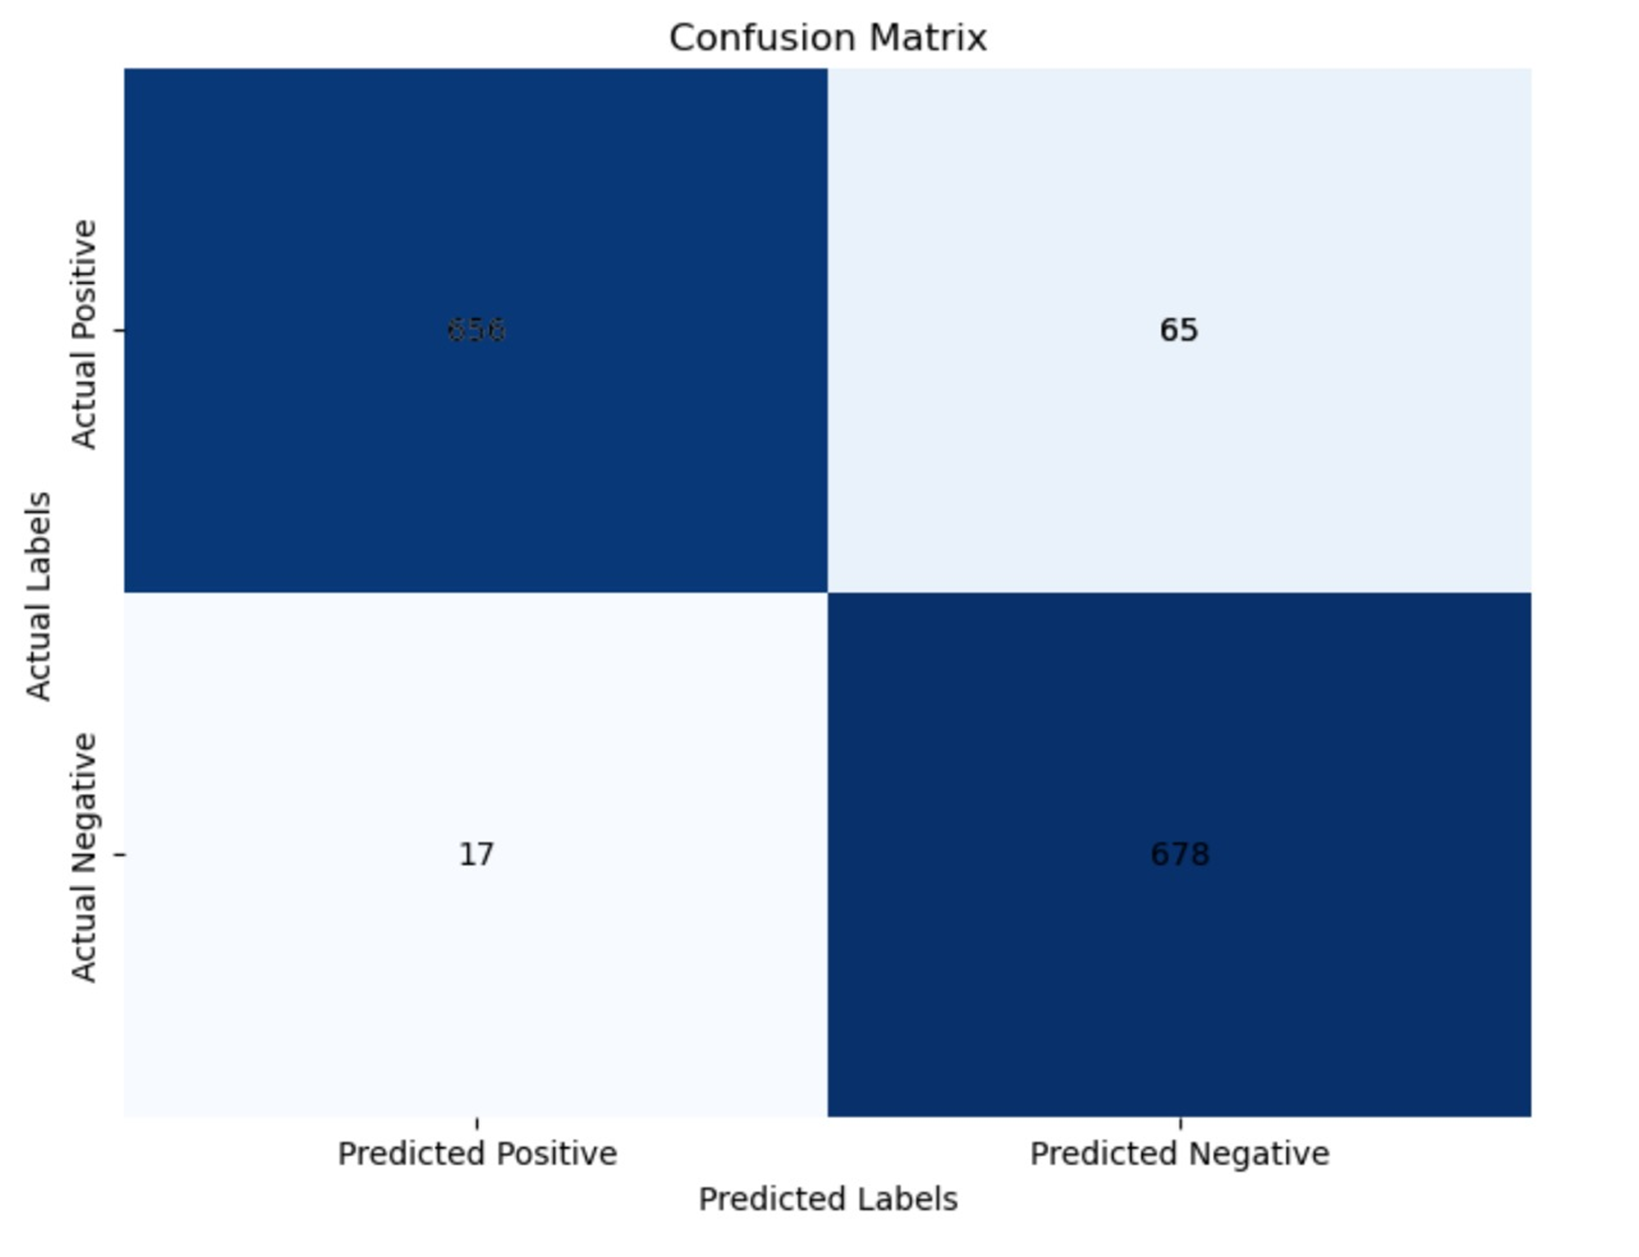
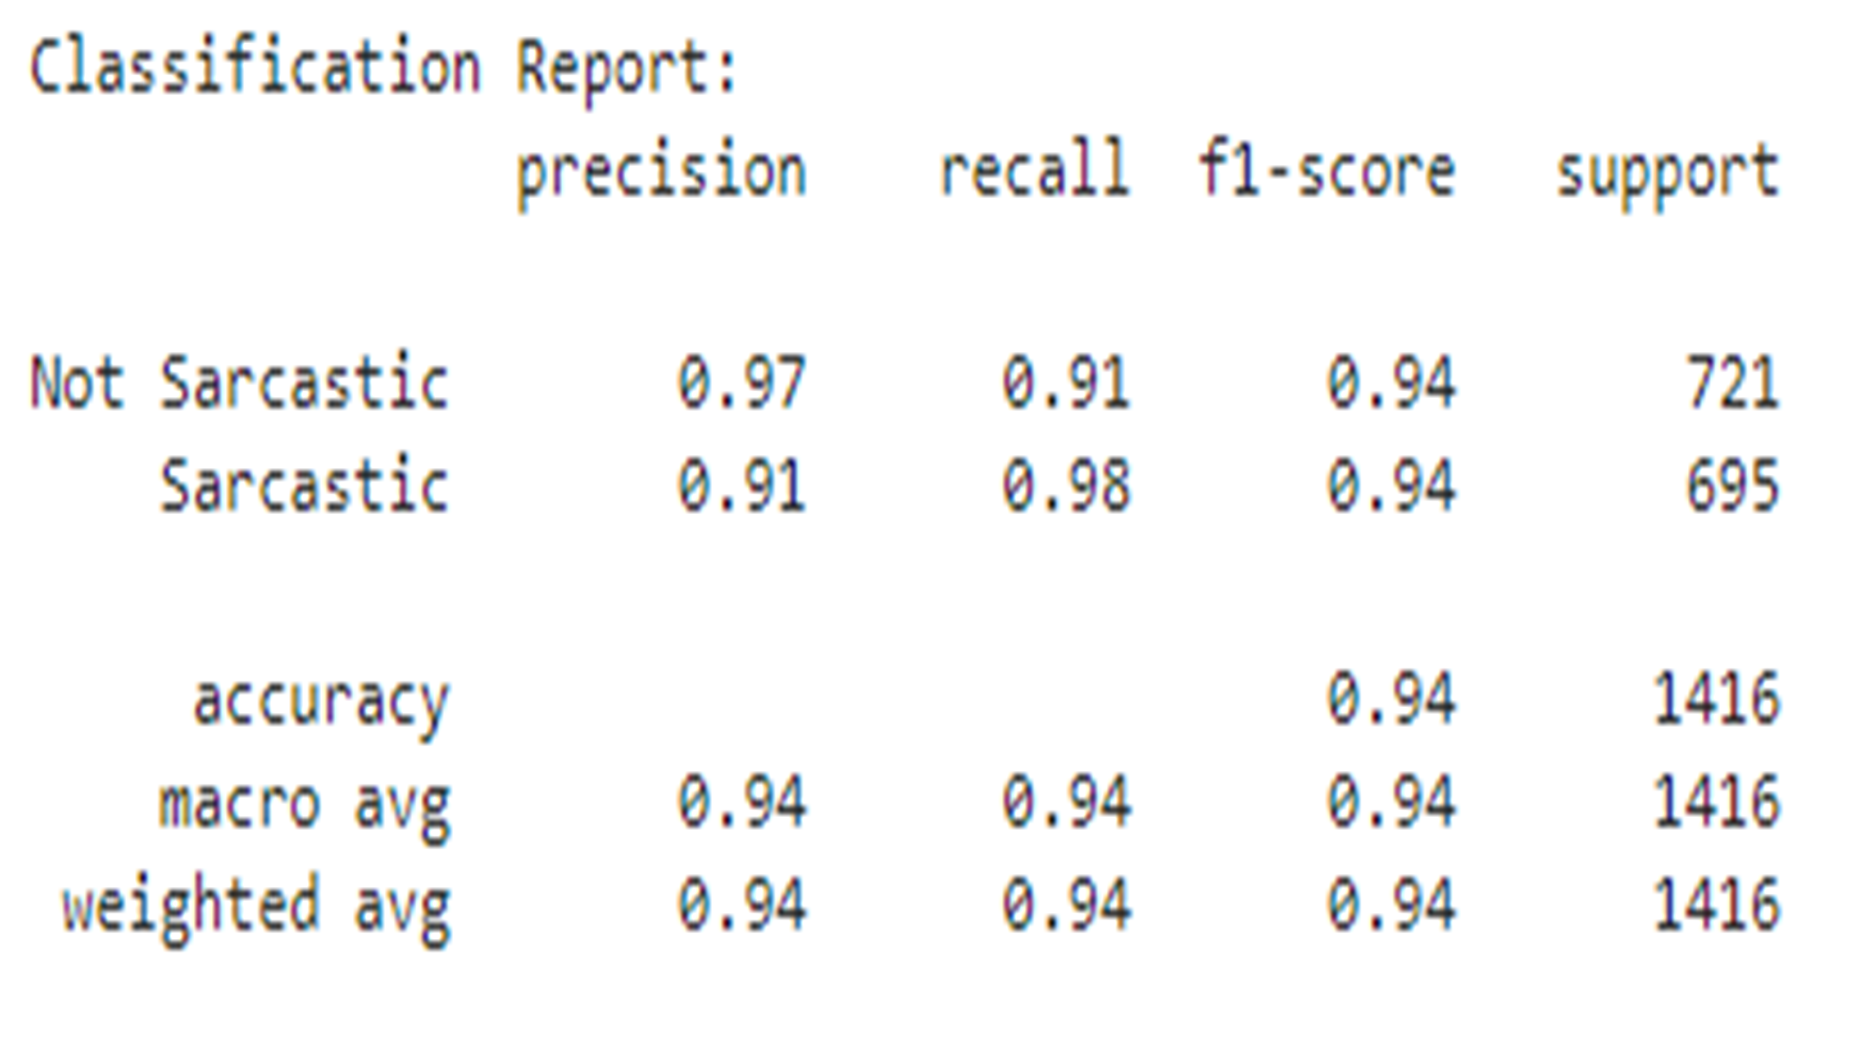

# DEMO

Importing libraries

In [34]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords, wordnet
from transformers import BertTokenizer, BertForSequenceClassification
import torch

Preprocessing function

In [24]:
# Function to preprocess input text
def preprocess_input(text):
    text = preprocess_text(text)
    text = remove_stopwords_vectorized(np.array([text]))
    return text[0]

Prediction function

In [25]:
# Function to predict sarcasm
def predict_sarcasm(text, model, tokenizer):
    # Preprocess the input text
    processed_text = preprocess_input(text)
    
    # Tokenize the input text
    inputs = tokenizer(processed_text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    
    # Get the predictions from the model
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get the predicted label
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    
    # Map the predicted class to the corresponding label
    label_map = {0: 'Not Sarcastic', 1: 'Sarcastic'}
    prediction = label_map[predicted_class]
    
    return prediction


Example Comments

In [29]:
# You can add more examples to test the functionality
more_examples = [
    "Oh great, another rainy day. Just what I needed!",
    "I can't wait to work all weekend.",
    "That was the best movie I've ever seen."
]

for example in more_examples:
    prediction = predict_sarcasm(example, model, tokenizer)
    print(f"Prediction: {prediction}")

Sarcastic 
Sarcastic 
Not Sarcastic
